Billiards

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('good_plays.csv', delimiter=',',dtype = np.float64)
data = data[1:]
np.random.shuffle(data)

In [9]:
index = (data[:,14]==0)
x = data[:,:4]
y = data[:,4:6]
col = data[:,-2:]
new_ = data[index]


In [10]:
#Sequência de verdadeiros e falsos para cada buraco
enca = np.array([((data[:,9]==.01) * (data[:,10]==.01) * (data[:,2]-data[:,0]<0) * (data[:,3]-data[:,1]<0)),
                 ((data[:,9]==.01) * (data[:,10]==.74) * (data[:,2]-data[:,0]<0) * (data[:,3]-data[:,1]>0)),
                 ((data[:,9]==.99) * (data[:,10]==.01) * (data[:,2]-data[:,0]>0) * (data[:,3]-data[:,1]<0)),
                 ((data[:,9]==.99) * (data[:,10]==.74) * (data[:,2]-data[:,0]>0) * (data[:,3]-data[:,1]>0))])


In [52]:
def norm(M, mean, std):
 out = (M-mean)/std
 return out


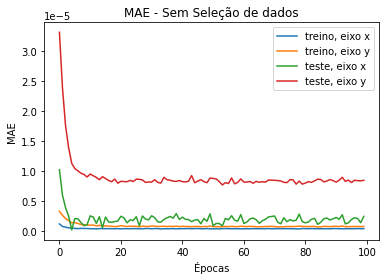

In [20]:
from sklearn.linear_model import SGDRegressor

good_plays = np.sum(enca,axis=0).astype(np.bool)#jogadas que acertam
x_ = x[good_plays] #bolas encaçapadas no buraco à direita e abaixo
y_ = y[good_plays] #bolas encaçapadas no buraco à direita e abaixo
col_ = col[good_plays] #bolas encaçapadas no buraco à direita e abaixo

x0 = x_[:,0] #posição da bola branca em x
x1 = x_[:,1] #posição da bola colorida em x
x2 = x_[:,2] #posição da bola branca em y
x3 = x_[:,3] #posição da bola colorida em y

#Definição do treino para obter o valor de x da colisão
x__ = np.stack((x0,x1,x2,x3,x0**2,x1**2,x2**2,x3**2),axis=1)
y__ = col_[:,[0,1]]-x_[:,[0,1]]
x_train = x__[:int(x__.shape[0]*.9)]
y_train = y__[:int(y__.shape[0]*.9)]
x_test  = x__[int(x__.shape[0]*.9):]
y_test  = y__[int(y__.shape[0]*.9):]

normx  = [np.mean(x_train, axis=0),np.std(x_train, axis=0)]
normy  = [np.mean(y_train, axis=0),np.std(y_train, axis=0)]
x_train_norm = norm(x_train, normx[0], normx[1])
y_train_norm = norm(y_train, normy[0], normy[1])
x_test_norm = norm(x_test, normx[0], normx[1])
y_test_norm = norm(y_test, normy[0], normy[1])
alpha = 1e-4
model = [SGDRegressor(alpha=alpha) for i in range(y.shape[1])]

epochs = 100
rmse_train = []
rmse_test = []
for i in range(epochs):
 for j in range(y.shape[1]):
  model[j].partial_fit(x_train_norm,y_train_norm[:,j])
 y_pred_train = np.stack([model[j].predict(x_train_norm) for j in range(y.shape[1])],axis=1)
 y_pred_train = (y_pred_train * normy[1])+normy[0]
 y_pred_test = np.stack([model[j].predict(x_test_norm) for j in range(y.shape[1])],axis=1)
 y_pred_test = (y_pred_test * normy[1])+normy[0]
 rmse_train.append(np.sum(abs(y_train-y_pred_train),axis=1)/y_train.shape[0])
 rmse_test.append (np.sum(abs(y_test -y_pred_test ),axis=1)/y_test.shape [0])
rmse_train = np.stack(rmse_train,axis=1)
rmse_test  = np.stack(rmse_test,axis=1)

plt.title('MAE - Sem Seleção de dados')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.plot(np.linspace(0,epochs-1,epochs),rmse_train[0], label='treino, eixo x')
plt.plot(np.linspace(0,epochs-1,epochs),rmse_train[1], label='treino, eixo y')
plt.plot(np.linspace(0,epochs-1,epochs),rmse_test[0], label='teste, eixo x')
plt.plot(np.linspace(0,epochs-1,epochs),rmse_test[1], label='teste, eixo y')
plt.legend()
plt.savefig('sgd_only.png')
plt.show()
    

Divisão

In [21]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

model_ = LogisticRegression(multi_class='multinomial', solver='lbfgs')
good_plays = np.sum(enca,axis=0).astype(np.bool)#jogadas que acertam
x__ = x[good_plays]
y_bernoulli = enca.T[good_plays]
y__ = np.sum([i*y_bernoulli[:,i] for i in range(4)],axis=0)
x_train = x__[:int(x__.shape[0]*.9)]
y_train = y__[:int(y__.shape[0]*.9)]
x_test  = x__[int(x__.shape[0]*.9):]
y_test  = y__[int(y__.shape[0]*.9):]

model_.fit(x_train,y_train)
print('Acurácia de treino:')
print(np.mean((model_.predict(x_train)==y_train)))
print('Acurácia de teste:')
print(np.mean((model_.predict(x_test)==y_test)))

Acurácia de treino:
0.9926528367122427
Acurácia de teste:
0.9925768822905621


[0.209874   0.17225189]
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)
(6004,)


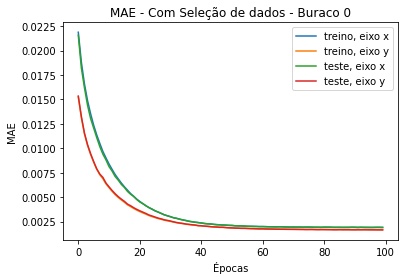

[0.21047346 0.172859  ]
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)
(6079,)


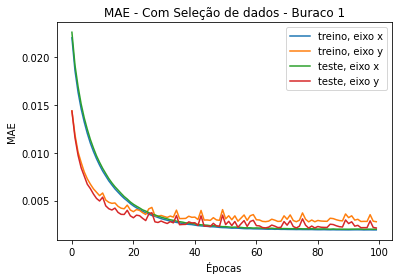

[0.20422485 0.16711386]
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)
(6631,)


KeyboardInterrupt: 

In [62]:
model=[]
normx=[]
normy=[]
for buraco in range(4):
    x_ = x[enca[buraco]] #bolas encaçapadas no buraco à direita e abaixo
    y_ = y[enca[buraco]] #bolas encaçapadas no buraco à direita e abaixo
    col_ = col[enca[buraco]] #bolas encaçapadas no buraco à direita e abaixo

    x0 = x_[:,0] #posição da bola branca em x
    x1 = x_[:,1] #posição da bola colorida em x
    x2 = x_[:,2] #posição da bola branca em y
    x3 = x_[:,3] #posição da bola colorida em y
    
    #Definição do treino para obter o valor de x da colisão
    x__ = np.stack((x0,x1,x2,x3,x0**2,x1**2,x2**2,x3**2),axis=1)
    y__ = col_[:,[0,1]]-x_[:,[0,1]]
    x_train = x__[:int(x__.shape[0]*.9)]
    y_train = y__[:int(y__.shape[0]*.9)]
    x_test  = x__[int(x__.shape[0]*.9):]
    y_test  = y__[int(y__.shape[0]*.9):]

    normx.append([np.mean(x_train, axis=0),np.std(x_train, axis=0)])
    normy.append([np.mean(y_train, axis=0),np.std(y_train, axis=0)])
    print(np.std(y_train,axis=0))
    x_train_norm = norm(x_train, normx[buraco][0], normx[buraco][1])
    y_train_norm = norm(y_train, normy[buraco][0], normy[buraco][1])
    x_test_norm = norm(x_test, normx[buraco][0], normx[buraco][1])
    y_test_norm = norm(y_test, normy[buraco][0], normy[buraco][1])
    alpha = 1e-4
    model.append([SGDRegressor(alpha=alpha) for i in range(y.shape[1])])#um modelo para cada buraco

    epochs = 100
    rmse_train = []
    rmse_test = []
    for i in range(epochs):
     for j in range(y.shape[1]):
      model[buraco][j].partial_fit(x_train_norm,y_train_norm[:,j])
     y_pred_train = np.stack([model[buraco][j].predict(x_train_norm) for j in range(y.shape[1])],axis=1)
     y_pred_train = (y_pred_train * normy[buraco][1])+normy[buraco][0]
     y_pred_test = np.stack([model[buraco][j].predict(x_test_norm) for j in range(y.shape[1])],axis=1)
     y_pred_test = (y_pred_test * normy[buraco][1])+normy[buraco][0]
     rmse_train_=np.sum(abs(y_train-y_pred_train),axis=0)/y_train.shape[0]
     rmse_test_=np.sum(abs(y_test -y_pred_test ),axis=0)/y_test.shape [0]
     rmse_train.append(rmse_train_)
     rmse_test.append (rmse_test_)
    rmse_train = np.stack(rmse_train,axis=1)
    rmse_test  = np.stack(rmse_test,axis=1)

    plt.title(f'MAE - Com Seleção de dados - Buraco {buraco}')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.plot(np.linspace(0,epochs-1,epochs),rmse_train[0], label='treino, eixo x')
    plt.plot(np.linspace(0,epochs-1,epochs),rmse_train[1], label='treino, eixo y')
    plt.plot(np.linspace(0,epochs-1,epochs),rmse_test[0], label='teste, eixo x')
    plt.plot(np.linspace(0,epochs-1,epochs),rmse_test[1], label='teste, eixo y')
    plt.legend()
    plt.savefig(f'{buraco}.png')
    plt.show()

    